In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
df.shape

(289, 14)

In [5]:
X = df.drop(columns=["output"])

In [6]:
y = df["output"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [12]:
X_train.shape, y_train.shape

((231, 13), (231,))

In [11]:
X_test.shape, y_test.shape

((58, 13), (58,))

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [28]:
from sklearn.ensemble import StackingClassifier

In [29]:
estimators = [
    ("rf", RandomForestClassifier(n_estimators=10, random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=10)),
    ("gbdt", GradientBoostingClassifier()),
]

In [30]:
model = StackingClassifier(estimators=estimators,
                    final_estimator=LogisticRegression())

In [31]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import f1_score, accuracy_score

In [48]:
print("F1 Score: ",f1_score(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))

F1 Score:  0.8607594936708862
Accuracy:  0.8103448275862069


### Let's check for OOB-score (out of bag score)

In [49]:
rf = RandomForestClassifier(oob_score=True)

In [50]:
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [51]:
rf.oob_score_ # oob_score: data which is not selected while train, how our model is doing on it?

0.8225108225108225

In [52]:
y_pred = rf.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.8275862068965517

In [54]:
# accuracy score and oob score should not have more difference

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [57]:
from sklearn.tree import plot_tree

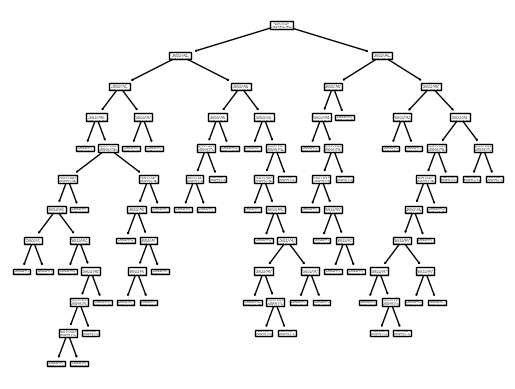

In [59]:
plot_tree(dt);

In [60]:
dt.feature_importances_

array([0.03526471, 0.02569049, 0.13836186, 0.08142806, 0.0770008 ,
       0.01059384, 0.        , 0.11558391, 0.01059384, 0.11459925,
       0.00755859, 0.0936533 , 0.28967134])

## we can have trees from random forest and print those

In [61]:
rf = RandomForestClassifier(n_estimators=2)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [71]:
rf.feature_importances_ # here we are getting average values from all trees for the feature

array([0.12290298, 0.02919894, 0.18102215, 0.04093263, 0.07218567,
       0.01384806, 0.03372077, 0.15390742, 0.04059064, 0.08463724,
       0.06494363, 0.09499445, 0.06711543])

In [65]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1688432610),
 DecisionTreeClassifier(max_features='sqrt', random_state=1324816035)]

### see we can have thode trees and plot those

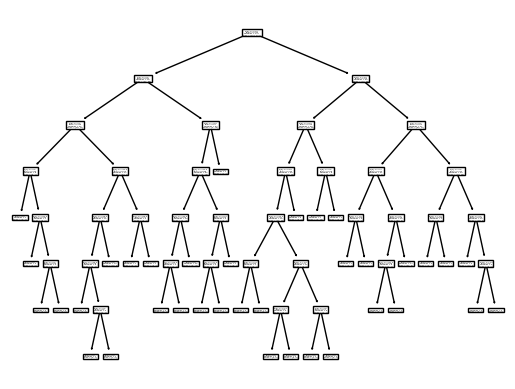

In [68]:
plot_tree(rf.estimators_[0]);

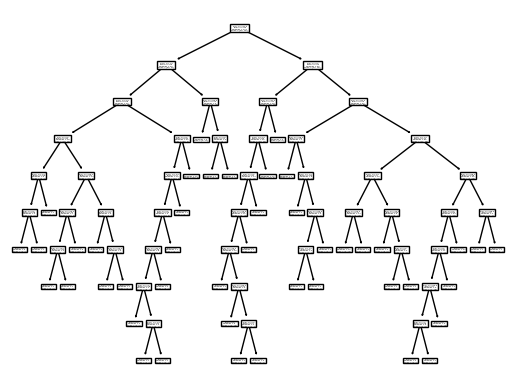

In [69]:
plot_tree(rf.estimators_[1]);

### Assignment: Random Forest vs Bagging , have a comparision to check Rf(DT) == Bagging(DT) ?

**Resources:**
- Must read this [Blog](https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/)